In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('airlines_flights_data.csv')

In [6]:
data.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
data.tail()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [9]:
data.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [10]:
from scipy.stats import chi2_contingency, f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, ShuffleSplit

In [11]:
data.sample(7)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
211136,211136,Vistara,UK-859,Delhi,Morning,one,Night,Mumbai,Business,12.58,42,41281
69159,69159,Vistara,UK-954,Mumbai,Early_Morning,one,Evening,Kolkata,Economy,12.08,43,5949
106777,106777,GO_FIRST,G8-146,Bangalore,Evening,two_or_more,Early_Morning,Kolkata,Economy,15.00,30,5177
68672,68672,Indigo,6E-5366,Mumbai,Morning,one,Afternoon,Kolkata,Economy,6.33,41,2835
245294,245294,Air_India,AI-610,Bangalore,Evening,one,Afternoon,Delhi,Business,17.08,8,42521
7323,7323,Indigo,6E-607,Delhi,Night,one,Morning,Mumbai,Economy,10.17,37,3657
109376,109376,Vistara,UK-852,Bangalore,Morning,two_or_more,Evening,Kolkata,Economy,10.08,47,11372


In [12]:
data.shape

(300153, 12)

EDA and Analysis

In [13]:
def descriptive_analysis(dataset:pd.DataFrame, n_cols):
    stats_data = dataset[n_cols]. describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])
    stats_data.loc['skew'] = dataset[n_cols].skew()
    stats_data.loc['kurtosis'] = dataset[n_cols].kurtosis()

    q1 = dataset[n_cols].quantile(0.25)
    q3 = dataset[n_cols].quantile(0.75)
    iqr = q3 - q1

    outlier_dect=((dataset[n_cols] < (q1 - 1.5 * iqr)) | (dataset[n_cols] > (q3 + 1.5*iqr)))
    outlier_count = outlier_dect.sum().rename('outlier_count')
    stats_data = pd.concat([stats_data, outlier_count.to_frame().T])
    return stats_data
num_cols = ["index", "duration", "days_left", "price"]
num_stats = descriptive_analysis(data, num_cols)
print(num_stats)

                       index       duration      days_left          price
count          300153.000000  300153.000000  300153.000000  300153.000000
mean           150076.000000      12.221021      26.004751   20889.660523
std             86646.852011       7.191997      13.561004   22697.767366
min                 0.000000       0.830000       1.000000    1105.000000
25%             75038.000000       6.830000      15.000000    4783.000000
50%            150076.000000      11.250000      26.000000    7425.000000
75%            225114.000000      16.170000      38.000000   42521.000000
95%            285144.400000      25.920000      47.000000   63277.000000
99%            297150.480000      29.080000      49.000000   76736.000000
max            300152.000000      49.830000      49.000000  123071.000000
skew                0.000000       0.602899      -0.035464       1.061377
kurtosis           -1.200000      -0.268996      -1.156215      -0.396293
outlier_count       0.000000    2110.0

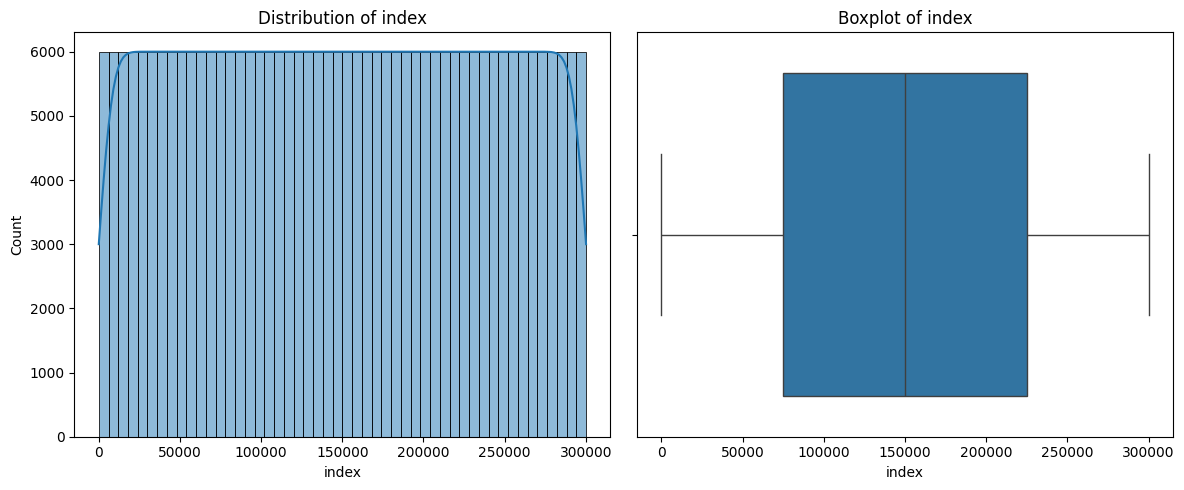

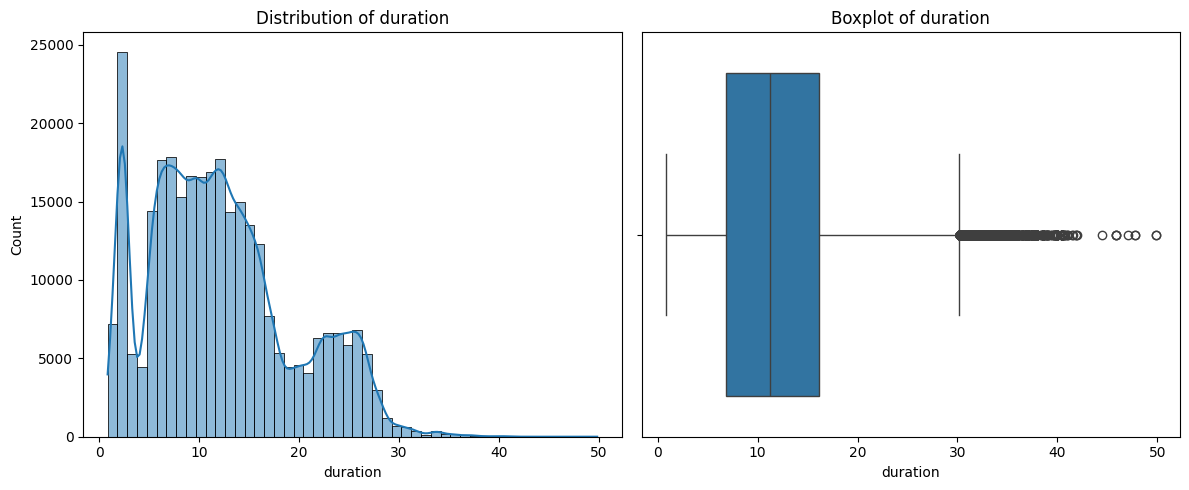

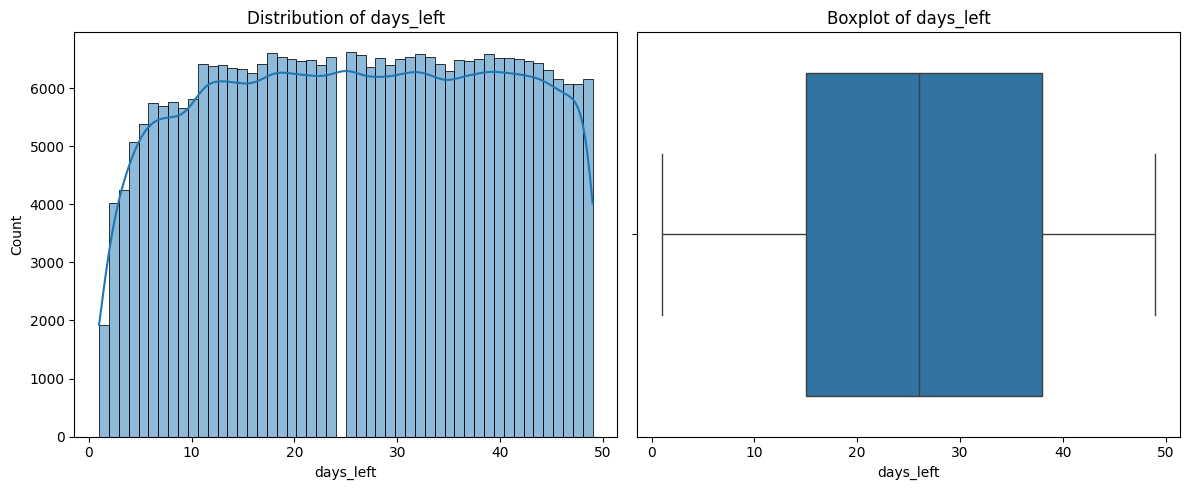

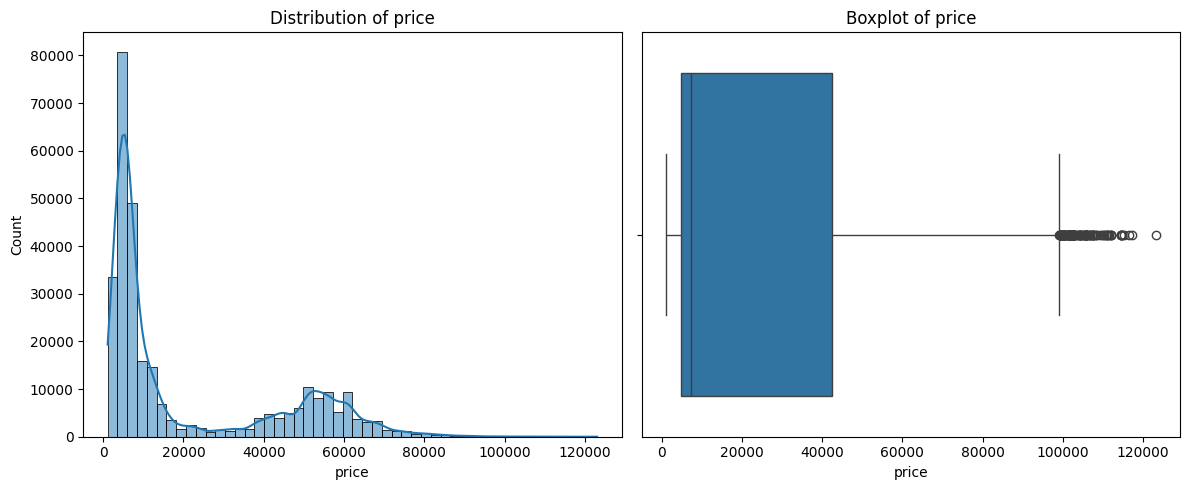

In [15]:
def plot_numerical_distribution(df, num_cols):
    for col in num_cols:
        plt.figure(figsize=(12,5))

        plt.subplot(1,2,1)
        sns.histplot(df[col], kde = True, bins=50)
        plt.title(f"Distribution of {col}")

        #outlier
        plt.subplot(1,2,2)
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.tight_layout()
        plt.show()

plot_numerical_distribution(data, num_cols)

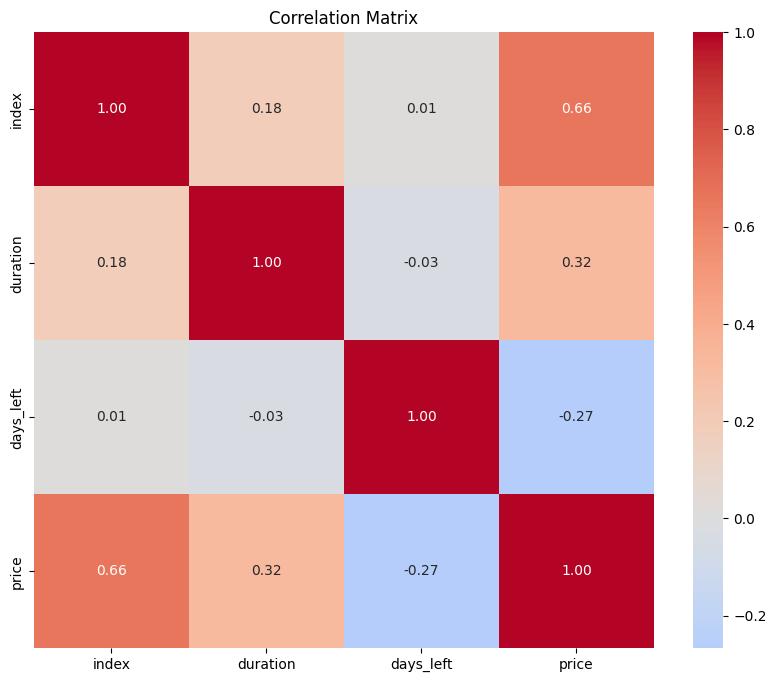

In [17]:
def plot_correlation_matrix(df, n_cols):
    corr_m = df[n_cols].corr(method="spearman")
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_m , annot=True, cmap='coolwarm', center = 0, fmt = '.2f')
    plt.title("Correlation Matrix")
    plt.show()
plot_correlation_matrix(data, num_cols)

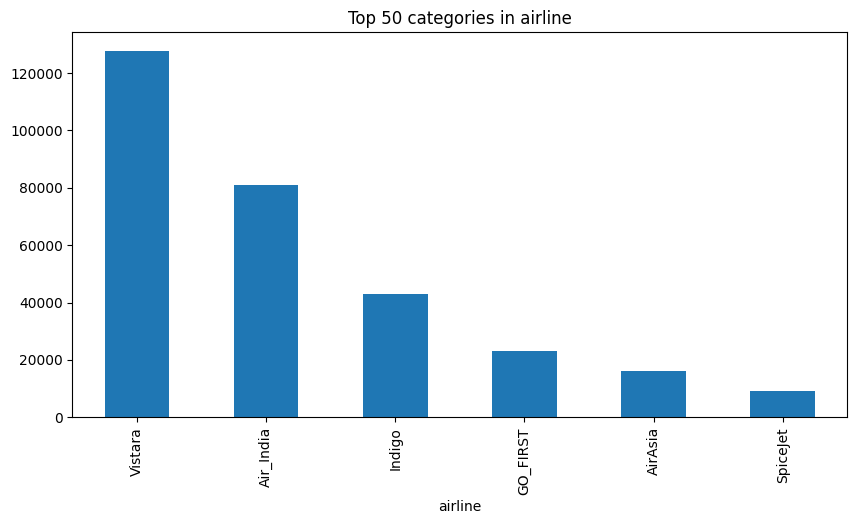

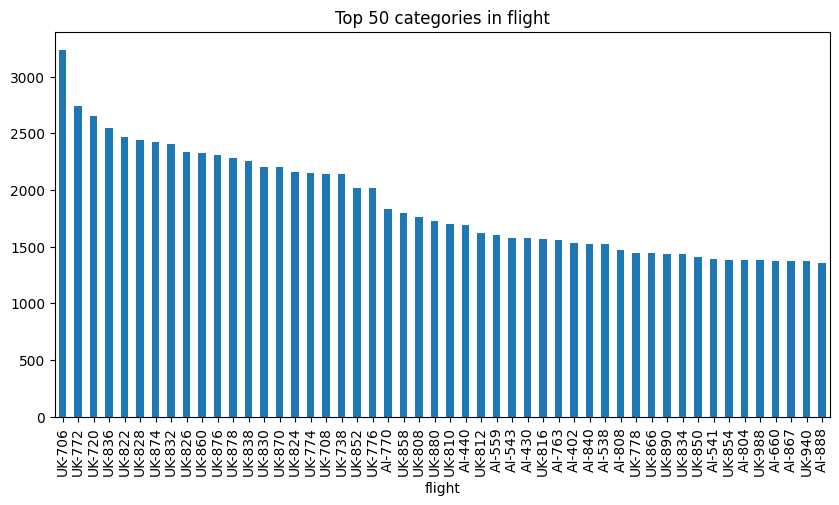

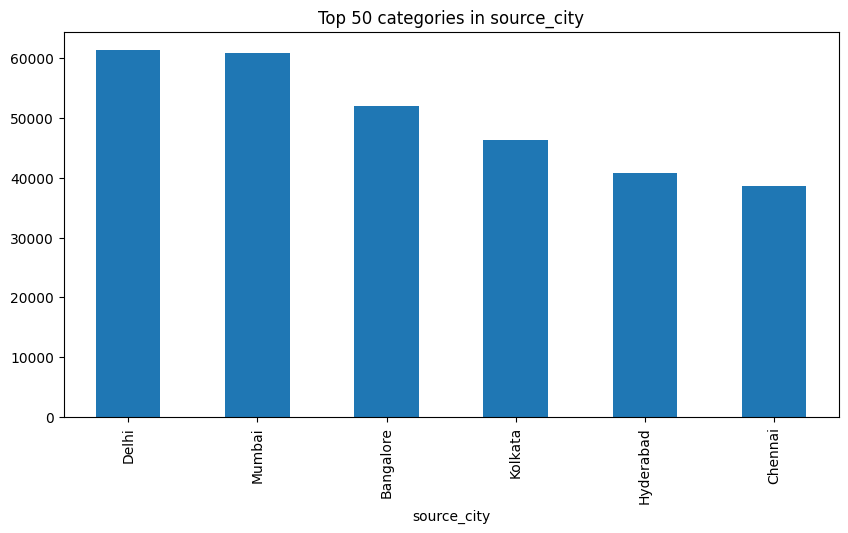

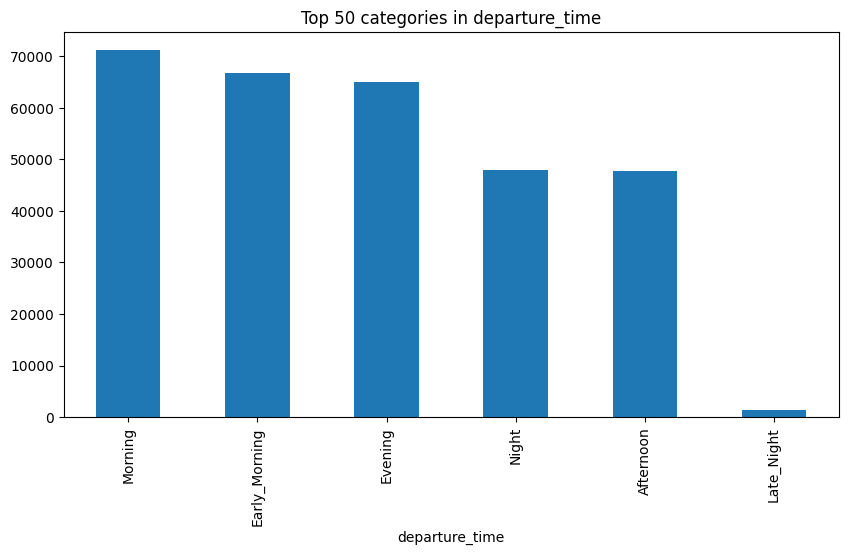

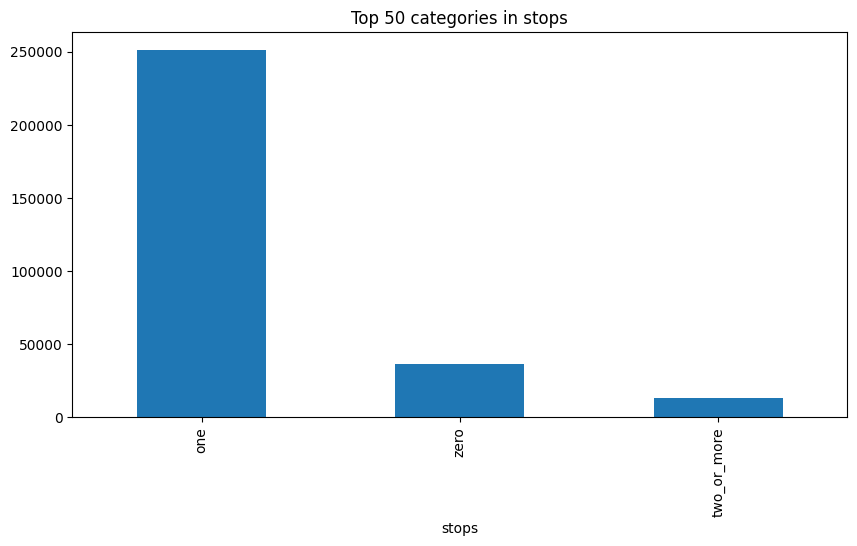

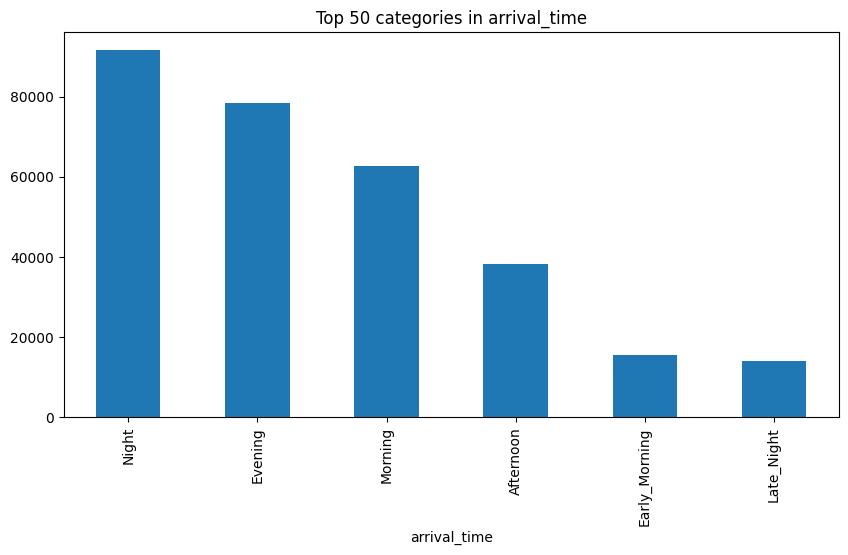

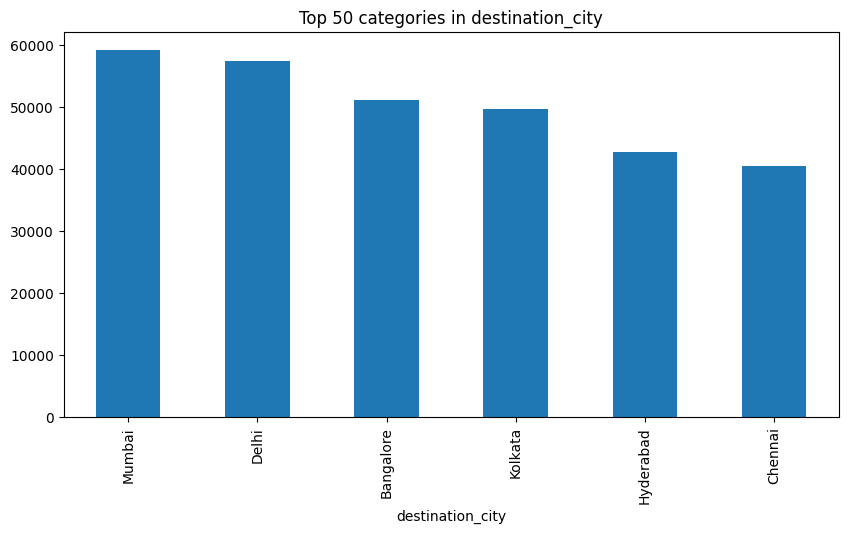

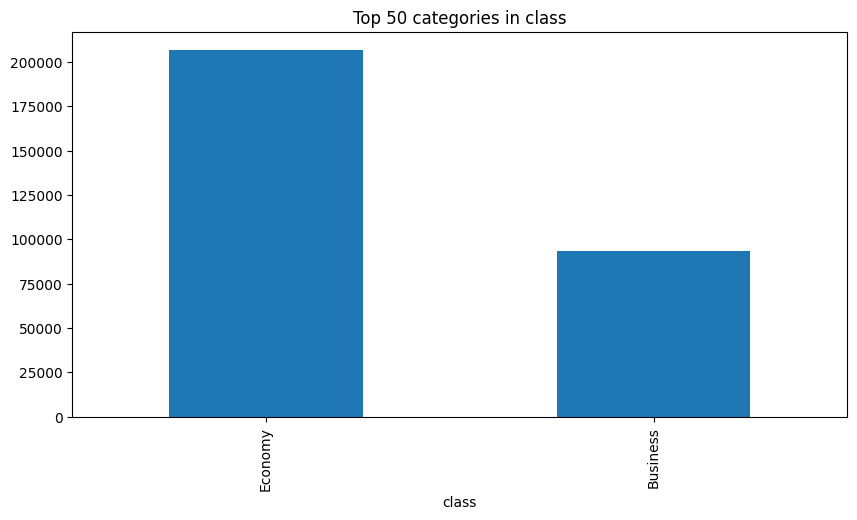

In [20]:
def Freq_analysis(data:pd.DataFrame, cat_columns, top_n:int=50):
    for col in cat_columns:
        freq = data[col].value_counts().nlargest(top_n)

        plt.figure(figsize=(10,5))
        freq.plot(kind="bar")
        plt.title(f"Top {top_n} categories in {col}")
        plt.xticks(rotation = 90)
        plt.show()

cat_cols = data.select_dtypes(include=["object"]).columns
Freq_analysis(data,cat_cols)